In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns

In [92]:
df = pd.read_csv("Week2_2023.06.06_Lab1_marketing_customer_analysis_clean.csv")

In [93]:
# save numerical columns
dfNumeric = df._get_numeric_data()
#print(dfNumeric.shape)
#print(dfNumeric.columns)

# save categorical columns
dfCategorical = df.drop(list(dfNumeric.columns), axis=1, inplace=False)
#print(dfCategorical.shape)
#print(dfCategorical.columns)
#dfCategorical = df.drop([dfNumeric.columns], axis=1, inplace=False)

In [94]:
dfNumeric.columns

Index(['Unnamed: 0', 'customer lifetime value', 'income',
       'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'total claim amount', 'month'],
      dtype='object')

In [95]:
pdf = dfNumeric.drop("Unnamed: 0",axis=1)
pdf = pdf.dropna()

In [96]:
pdfTarget = pdf["total claim amount"]
pdf = pdf.drop("total claim amount",axis=1)

## 1. without transforming data

In [97]:
pdf.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
5,4745.181764,50549,61,2.0,73,0.0,7,2


In [98]:
pdf = pdf.reset_index(drop=True)

In [99]:
pdf.head(3)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2


#### we want to predict the weight of the penguins based on the flipper length

In [100]:
X = pdf
y = pdfTarget

In [101]:
print(X.shape)
print(y.shape)
#y = pdfTarget

(10277, 8)
(10277,)


#### train-test split

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [112]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7193, 8)
(3084, 8)
(7193,)
(3084,)


#### model generation

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
#instantiating linear regression object
lm  = LinearRegression() # fit_intercept = True

In [115]:
# calculating the best fit by minimizing the loss function - calculating the model parameters - slope and intercept
model = lm.fit(X_train, y_train)

In [116]:
# model slope
print(model.coef_)
# model intercept
print(model.intercept_)

[-3.03118930e-04 -3.30763445e-03  5.41199075e+00 -1.07933456e-02
 -1.19974470e-01 -2.90235442e+00 -1.23581957e-01  2.76969659e+00]
60.80130183052148


In [117]:
y_pred = model.predict(X_test)

In [118]:
#y_test - y_pred
compare = pd.DataFrame({"y_test":list(y_test), "y_pred":list(y_pred)})

In [119]:
compare

,y_test,y_pred
0,326.400000,342.123485
1,209.504391,621.104674
2,523.888845,367.453851
3,504.000000,329.940246
4,135.888306,449.976424
...,...,...
3079,330.782934,282.293920
3080,405.804184,453.081242
3081,648.000000,537.010494
3082,161.615740,930.786949


#### model evaluation

In [120]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [121]:
mse(y_test,y_pred)

40333.24857039886

In [122]:
mae(y_test,y_pred)

143.1337950424027

In [123]:
import matplotlib.pyplot as plt

In [127]:
print(type(y_pred))
print(type(y_test))
y_test_array = np.array(y_test)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [130]:
print(type(y_test_array))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


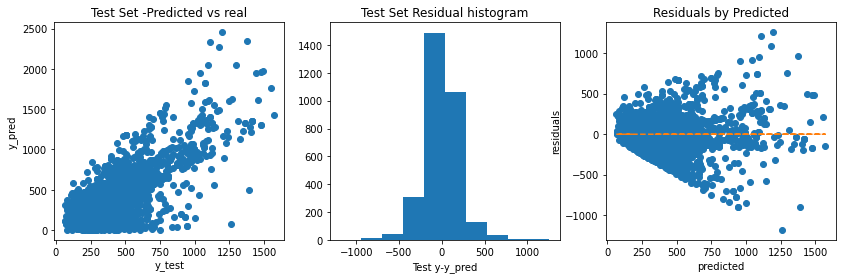

In [132]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_array, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_array - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_array - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## 2. with transforming data